In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import scmdata
import tqdm.autonotebook as tqdman
import math
import random
from random import choices
from scipy.stats import lognorm
from scipy.stats import norm
import numpy as np

import utils

import warnings

warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

<IPython.core.display.Javascript object>

/var/folders/2n/v3g75q4d3636klrs2jxq81zc0000gp/T/ipykernel_42433/3064879529.py:4: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

In [3]:
ar6_wg3_data_dir = utils.DATA_DIR / "raw" / "ar6-wg3"

<IPython.core.display.Javascript object>

Specify output file.

In [4]:
ID = "all_scenarios"
ID = "zn_fullset"

OUTPUT_FILE = (
    utils.DATA_DIR
    / "interim"
    / "ar6-wg3-extended"
    / f"wg3-timeseries-extended_{ID}.csv"
)
OUTPUT_FILE.parent.parent.mkdir(exist_ok=True)
OUTPUT_FILE.parent.mkdir(exist_ok=True)

<IPython.core.display.Javascript object>

## Load scenarios

Here we load the scenarios using [scmdata](https://github.com/openscm/scmdata).

In [5]:
# SOURCE_DATA = str(ar6_wg3_data_dir / "sample_harmonized_infilled_emissions.csv")
# SOURCE_DATA = str(ar6_wg3_data_dir / "ar6emissions_ndc_snapshot.csv")
SOURCE_DATA = str(ar6_wg3_data_dir / "ar6emissions_ndc_relscenarios.csv")

wg3_emissions_raw = scmdata.ScmRun(SOURCE_DATA, lowercase_cols=True)
# Only keep the infilled stuff, we don't care about harmonised now
wg3_emissions_raw = wg3_emissions_raw.filter(variable="*Infilled*")

<IPython.core.display.Javascript object>

In [6]:
scen_model_list = wg3_emissions_raw.get_unique_meta("ms")

<IPython.core.display.Javascript object>

In [7]:
# wg3_emissions = wg3_emissions_raw.filter(ms=scen_model_list[:])  # [:10])
wg3_emissions = wg3_emissions_raw

<IPython.core.display.Javascript object>

In [8]:
scen_model_list_used = wg3_emissions_raw.get_unique_meta("ms")
len(scen_model_list_used)

355

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='time', ylabel='Mt CO2/yr'>

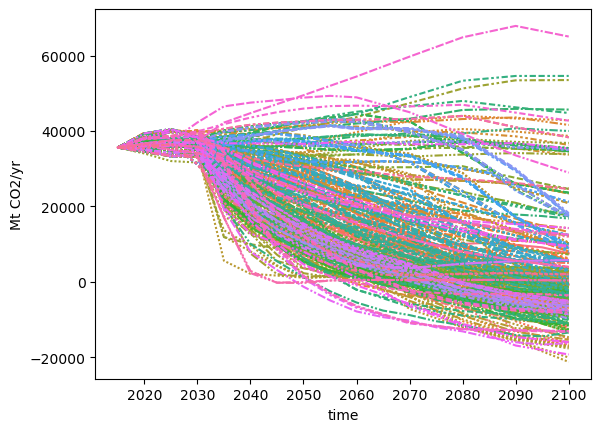

<IPython.core.display.Javascript object>

In [9]:
wg3_emissions.filter(
    variable="*CO2*Energy*",
    scenario=wg3_emissions.get_unique_meta("scenario"),  # [:100]
).lineplot(legend=False, style="model")

In [10]:
# import datetime

# fig, ax = plt.subplots(figsize=(2, 5))
# # plt.figure()
# co2_total = (
#     wg3_emissions.filter(variable="*CO2*")
#     .process_over(
#         "variable",
#         "sum",
#         op_cols={"variable": "AR6 climate diagnostics|Infilled|Emissions|CO2"},
#         as_run=True,
#     )
#     .filter(variable="AR6 climate diagnostics|Infilled|Emissions|CO2")
#     .lineplot(
#         legend=False,
#         errorbar=False,
#         #  hue="scenario",
#         palette=["black"],
#         #   alpha=0.3,
#         ci=None,
#     )
# )
# fig.autofmt_xdate()
# # plt.xticks(
# #    np.arange(
# #        np.datetime64("2020-01-01"),
# #        np.datetime64("2100-01-01"),
# #        np.timedelta64(20, "Y"),
# #    ).astype(datetime),
# # )

# plt.title("CO2-emissions")

<IPython.core.display.Javascript object>

## Extend

In [9]:
ts = wg3_emissions.timeseries(time_axis="year")
ts.head()

time                                                                                                                                               2015  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.727424   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    47.547600   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   43.573400   
                                                                              kt CFC113/yr AR6 climate diagnostics|Infilled|Emissions|CFC113   0.874200   
                                                                              kt CFC114/yr AR6 climate diagnostics|Infilled|Emissions|CFC114   1.669600   

time                                                                                                                                               2016  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.697492   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    45.018546   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   41.881747   
                                                                              kt CFC113/yr AR6 climate diagnostics|Infilled|Emissions|CFC113   0.781611   
                                                                              kt CFC114/yr AR6 climate diagnostics|Infilled|Emissions|CFC114   1.515316   

time                                                                                                                                               2017  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.667540   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    42.482563   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   40.185459   
                                                                              kt CFC113/yr AR6 climate diagnostics|Infilled|Emissions|CFC113   0.688768   
                                                                              kt CFC114/yr AR6 climate diagnostics|Infilled|Emissions|CFC114   1.360609   

time                                                                                                                                               2018  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.637567   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    39.953508   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infille

<IPython.core.display.Javascript object>

### Create distribution for AFOLU floor

In [10]:
# make result reproducible
np.random.seed(1)
# lognormal distribution, scale=stddev, loc=mean
norm_AFOLU_all = norm.rvs(scale=0.5, size=2000)
# select only values -1 - 1
norm_AFOLU = [x for x in norm_AFOLU_all if (x > -1) and (x < 1)]
dist_AFOLU = pd.Series(norm_AFOLU)

<IPython.core.display.Javascript object>

Text(0, 0.5, '')

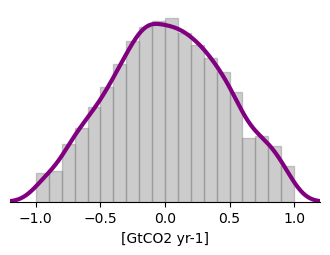

<IPython.core.display.Javascript object>

In [28]:
fig, ax = plt.subplots(figsize=(4, 2.5))
dist_AFOLU.plot(
    kind="hist", density=True, edgecolor="gray", bins=20, color="gray", alpha=0.4
)  # change density to true, because KDE uses density
dist_AFOLU.plot(kind="kde", color="purple", lw=3)
ax.set_xlim(-1.2, 1.2)
# ax.set_xlabel("net-negative emissions (GtCO2yr-1)")
ax.set_xlabel("[GtCO2 yr-1]")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylabel("")

### Create lognormal distribution for yearly fossil-CO2

In [22]:
# make result reproducible
np.random.seed(1)
# lognormal distribution, s=stddev, scale=mean
lognorm_fossil_all = lognorm.rvs(s=0.8, scale=15, size=2000)
# select only values < 40
lognorm_fossil = [x for x in lognorm_fossil_all if x <= 40]

<IPython.core.display.Javascript object>

Text(0, 0.5, '')

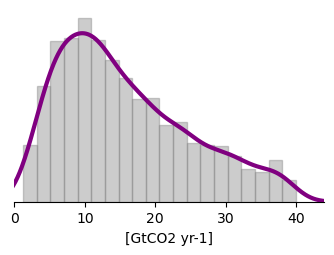

<IPython.core.display.Javascript object>

In [29]:
dist_fossil = pd.Series(lognorm_fossil)

fig, ax = plt.subplots(figsize=(4, 2.5))
dist_fossil.plot(
    kind="hist", density=True, edgecolor="gray", bins=20, color="gray", alpha=0.4
)  # change density to true, because KDE uses density
dist_fossil.plot(kind="kde", color="purple", lw=3)
ax.set_xlim(0, 44)
ax.set_xlabel("[GtCO2 yr-1]")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.get_yaxis().set_ticks([])
ax.set_ylabel("")

### Create distribution for gradient

In [16]:
# seed random too
random.seed(1010)

<IPython.core.display.Javascript object>

In [17]:
gradients = list(np.linspace(0, 3, 31))
choices(gradients)

[2.0]

<IPython.core.display.Javascript object>

# Extension

In [18]:
EXTEND_YEARS = list(range(2101, 2500 + 1))
EXTEND_AFTER_PHASE_IN_YEARS = list(range(2111, 2500 + 1))
PHASE_IN_YEARS = list(range(2101, 2110 + 1))
PHASE_OUT_YEARS = list(range(2101, 2110 + 1))
EXTEND_TO_FLOOR = list(range(2101, 2150 + 1))
YEARS_TO_FLOOR = 50  # i.e. 2150


def extend_constant(path):
    extended = pd.concat(
        [path, pd.DataFrame({y: path[2100] for y in EXTEND_YEARS})], axis="columns"
    )
    return extended


def extend_co2_fossil(path):
    # choose randomn value from lognormal distribution
    CDR_LEVEL = (choices(lognorm_fossil)[0]) * 1000
    grad_level = choices(gradients)[0]

    # if close to CDR_LEVEL continue with CDR_LEVEL
    if math.isclose(path[2100], -CDR_LEVEL, abs_tol=0.5):
        extension = pd.DataFrame({y: path[2100] for y in EXTEND_YEARS}) * 0 - CDR_LEVEL

        # if not at CDR_LEVEL yet, get there by 2150
    elif path[2100].item() != -CDR_LEVEL:
        extension = pd.DataFrame(
            {y: (path[2100] * 0 - CDR_LEVEL) for y in EXTEND_YEARS}
        )
        trend = (path[2100].item() - path[2091].item()) / 10
        trend_grad = trend + (trend * grad_level)
        if trend_grad > 0:
            trend_grad = -trend_grad

        if path[2100].item() > -CDR_LEVEL:
            for i in range(1, 400 + 1):
                extension[2100 + i] = path[2100] + (i * trend_grad)
                if extension[2100 + i].item() > -CDR_LEVEL:
                    continue
                else:
                    break

        elif path[2100].item() < -CDR_LEVEL:
            for i in range(1, 400 + 1):
                extension[2100 + i] = path[2100] - (i * trend_grad)
                if extension[2100 + i].item() < -CDR_LEVEL:
                    continue
                else:
                    break
        else:
            raise "error"
    else:
        raise "error"

    extended = pd.concat([path, extension], axis="columns")

    return extended


def extend_co2_afolu(path):
    AFOLU_FLOOR = (choices(norm_AFOLU)[0]) * 1000

    # 2100 value close to floor continue with floor
    if math.isclose(path[2100], AFOLU_FLOOR, abs_tol=0.2):
        extension = (
            pd.DataFrame({y: path[2100] for y in EXTEND_YEARS}) * 0 + AFOLU_FLOOR
        )

    # 2100 value is above or below the floor
    elif path[2100].item() != AFOLU_FLOOR:
        extension = (
            pd.DataFrame({y: path[2100] for y in EXTEND_YEARS}) * 0 + AFOLU_FLOOR
        )
        trend = (path[2100].item() - AFOLU_FLOOR) / YEARS_TO_FLOOR
        for i in range(1, len(EXTEND_TO_FLOOR)):
            extension[2100 + i] = path[2100] - (i * trend)

    else:
        raise "error"

    extended = pd.concat([path, extension], axis="columns")
    return extended


def extend(inp, metadata):
    if metadata["variable"].endswith("CO2|Energy and Industrial Processes"):
        return extend_co2_fossil(inp)

    if metadata["variable"].endswith("CO2|AFOLU"):
        return extend_co2_afolu(inp)

    return extend_constant(inp)

<IPython.core.display.Javascript object>

In [19]:
# check all variables with this
# wg3_emissions.get_unique_meta("variable")

<IPython.core.display.Javascript object>

In [22]:
%%time

keys = ["model", "scenario", "variable"]
ts_extended = pd.concat(
    [
        extend(path, {k: v for k, v in zip(keys, vs)})
        for vs, path in tqdman.tqdm(ts.groupby(keys))
    ]
)
ts_extended.head()

  0%|          | 0/19279 [00:00<?, ?it/s]

CPU times: user 3min 51s, sys: 1.29 s, total: 3min 52s
Wall time: 3min 52s


2015  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.727424   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    47.547600   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   43.573400   
                                                                              kt CFC113/yr AR6 climate diagnostics|Infilled|Emissions|CFC113   0.874200   
                                                                              kt CFC114/yr AR6 climate diagnostics|Infilled|Emissions|CFC114   1.669600   

                                                                                                                                                   2016  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.697492   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    45.018546   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   41.881747   
                                                                              kt CFC113/yr AR6 climate diagnostics|Infilled|Emissions|CFC113   0.781611   
                                                                              kt CFC114/yr AR6 climate diagnostics|Infilled|Emissions|CFC114   1.515316   

                                                                                                                                                   2017  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.667540   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    42.482563   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   40.185459   
                                                                              kt CFC113/yr AR6 climate diagnostics|Infilled|Emissions|CFC113   0.688768   
                                                                              kt CFC114/yr AR6 climate diagnostics|Infilled|Emissions|CFC114   1.360609   

                                                                                                                                                   2018  \
model       ms                                 region scenario                unit         variable                                                       
AIM/CGE 2.1 AIM/CGE 2.1CD-LINKS_INDC2030i_1600 World  CD-LINKS_INDC2030i_1600 Mt BC/yr     AR6 climate diagnostics|Infilled|Emissions|BC       9.637567   
                                                                              kt CCl4/yr   AR6 climate diagnostics|Infilled|Emissions|CCl4    39.953508   
                                                                              kt CFC11/yr  AR6 climate diagnostics|Infilled|Emissions|CFC11   38.493806   
                                                                              kt CFC113/yr AR6 climate diagnostics

<IPython.core.display.Javascript object>

In [23]:
ts_extended = ts_extended.reset_index()

<IPython.core.display.Javascript object>

## Add max yearly CDR, total CDR and total cumulative emissions to metadata

In [24]:
col_list = list(range(2030, 2500 + 1))

new_df = []
for ms_ in tqdman.tqdm(ts_extended["ms"].unique()):
    ms_df = ts_extended[ts_extended["ms"] == ms_]

    ### add max yearly CDR
    max_fossilCDR_value = ms_df[
        ms_df["variable"]
        == "AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes"
    ][2500].item()
    max_AFOLUCDR_value = ms_df[
        ms_df["variable"] == "AR6 climate diagnostics|Infilled|Emissions|CO2|AFOLU"
    ][2500].item()
    ms_df["max_CDR"] = max_fossilCDR_value + max_AFOLUCDR_value

    ### add total CDR; Exception raised when there are no negative values
    try:
        total_fossilCDR_value = (
            ms_df[
                ms_df["variable"]
                == "AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes"
            ][col_list]
            .apply(lambda x: x[x < 0])
            .sum(axis=1)
            .item()
        )
    except ValueError:
        total_fossilCDR_value = 0

    try:
        total_AFOLUCDR_value = (
            ms_df[
                ms_df["variable"]
                == "AR6 climate diagnostics|Infilled|Emissions|CO2|AFOLU"
            ][col_list]
            .apply(lambda x: x[x < 0])
            .sum(axis=1)
            .item()
        )
    except ValueError:
        total_AFOLUCDR_value = 0

    ms_df["total_CDR"] = total_fossilCDR_value + total_AFOLUCDR_value

    # ZN: commented out, let's discuss what we're doing here. It's cheap to
    #     do later so fine to remove for now
    #     ### add total cumulative emissions
    #     total_fossil_value = (
    #         ms_df[
    #             ms_df["variable"]
    #             == "AR6 climate diagnostics|Infilled|Emissions|CO2|Energy and Industrial Processes"
    #         ][col_list]
    #         .apply(lambda x: x[x > 0])
    #         .sum(axis=1)
    #         .item()
    #     )
    #     total_AFOLU_value = (
    #         ms_df[
    #             ms_df["variable"] == "AR6 climate diagnostics|Infilled|Emissions|CO2|AFOLU"
    #         ][col_list]
    #         .apply(lambda x: x[x > 0])
    #         .sum(axis=1)
    #         .item()
    #     )
    #     ms_df["total_emissions"] = total_fossil_value + total_AFOLU_value

    new_df.append(ms_df)

new_df = pd.concat(new_df)
new_df

  0%|          | 0/355 [00:00<?, ?it/s]

,model,ms,region,scenario,unit,variable,2015,2016,2017,2018,...,2493,2494,2495,2496,2497,2498,2499,2500,max_CDR,total_CDR
0,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,World,CD-LINKS_INDC2030i_1600,Mt BC/yr,AR6 climate diagnostics|Infilled|Emissions|BC,9.727424,9.697492,9.667540,9.637567,...,3.629700,3.629700,3.629700,3.629700,3.629700,3.629700,3.629700,3.629700,-13774.970781,-5.220670e+06
1,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,World,CD-LINKS_INDC2030i_1600,kt CCl4/yr,AR6 climate diagnostics|Infilled|Emissions|CCl4,47.547600,45.018546,42.482563,39.953508,...,0.246100,0.246100,0.246100,0.246100,0.246100,0.246100,0.246100,0.246100,-13774.970781,-5.220670e+06
2,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,World,CD-LINKS_INDC2030i_1600,kt CFC11/yr,AR6 climate diagnostics|Infilled|Emissions|CFC11,43.573400,41.881747,40.185459,38.493806,...,1.106700,1.106700,1.106700,1.106700,1.106700,1.106700,1.106700,1.106700,-13774.970781,-5.220670e+06
3,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,World,CD-LINKS_INDC2030i_1600,kt CFC113/yr,AR6 climate diagnostics|Infilled|Emissions|CFC113,0.874200,0.781611,0.688768,0.596179,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13774.970781,-5.220670e+06
4,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,World,CD-LINKS_INDC2030i_1600,kt CFC114/yr,AR6 climate diagnostics|Infilled|Emissions|CFC114,1.669600,1.515316,1.360609,1.206325,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13774.970781,-5.220670e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19274,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000,World,CD-LINKS_NDC2030i_1000,kt cC4F8/yr,AR6 climate diagnostics|Infilled|Emissions|PFC...,1.267200,1.307930,1.348772,1.389503,...,0.107708,0.107708,0.107708,0.107708,0.107708,0.107708,0.107708,0.107708,-6048.745802,-2.795905e+06
19275,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000,World,CD-LINKS_NDC2030i_1000,kt SF6/yr,AR6 climate diagnostics|Infilled|Emissions|SF6,8.020000,8.082686,8.145371,8.208057,...,0.847265,0.847265,0.847265,0.847265,0.847265,0.847265,0.847265,0.847265,-6048.745802,-2.795905e+06
19276,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000,World,CD-LINKS_NDC2030i_1000,kt SO2F2/yr,AR6 climate diagnostics|Infilled|Emissions|SO2F2,2.531700,2.613054,2.694631,2.775986,...,0.215362,0.215362,0.215362,0.215362,0.215362,0.215362,0.215362,0.215362,-6048.745802,-2.795905e+06
19277,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000,World,CD-LINKS_NDC2030i_1000,Mt SO2/yr,AR6 climate diagnostics|Infilled|Emissions|Sulfur,100.771167,99.340380,97.915516,96.496572,...,11.699329,11.699329,11.699329,11.699329,11.699329,11.699329,11.699329,11.699329,-6048.745802,-2.795905e+06


<IPython.core.display.Javascript object>

## Run and plot extension

In [25]:
wg3_emissions_extended = scmdata.ScmRun(new_df)

<IPython.core.display.Javascript object>

/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (133) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


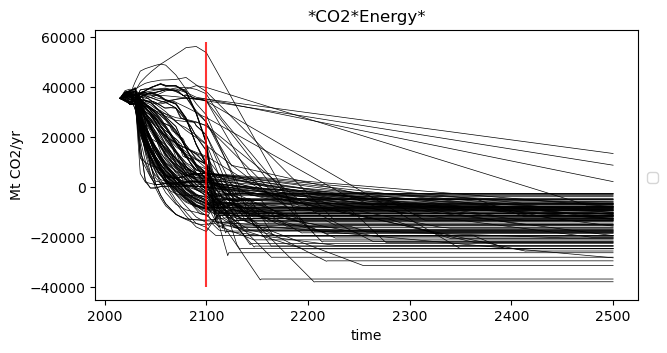

/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (133) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


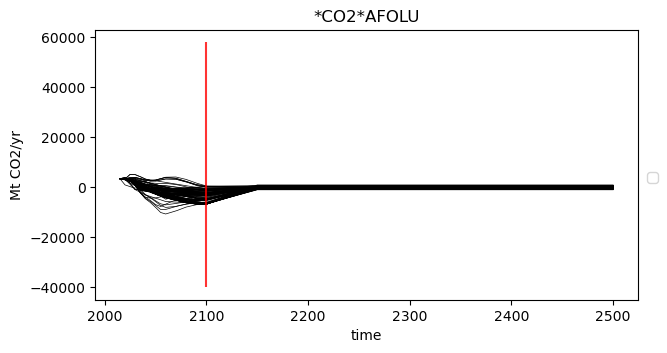

/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (133) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


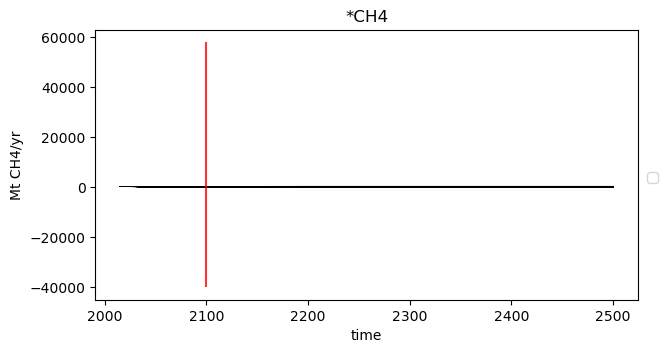

<IPython.core.display.Javascript object>

In [25]:
for vf in ["*CO2*Energy*", "*CO2*AFOLU", "*CH4"]:
    fig, ax = plt.subplots(figsize=(7, 3.5))
    ax = wg3_emissions_extended.filter(
        variable=vf,
        scenario=wg3_emissions_extended.get_unique_meta("scenario"),
    ).lineplot(style="variable", legend=False, ci=None, palette=["black"], lw=0.5)

    ax.legend(bbox_to_anchor=(1.05, 0.5))
    plt.vlines(np.datetime64("2100-01-01"), -40000, 58000, color="r", alpha=0.8)
    plt.title(vf)
    plt.show()

### Save extended emissions pathway

In [27]:
wg3_emissions_extended.to_csv(str(OUTPUT_FILE))

<IPython.core.display.Javascript object>

# End of notebook

### Plot combined fossil and AFOLU to check result

/data/ubuntu-znicholls/miniconda3/envs/baur-et-al-srm-commitment/lib/python3.9/site-packages/scmdata/plotting.py:96: UserWarning: 
The palette list has fewer values (1) than needed (133) and will cycle, which may produce an uninterpretable plot.
  ax = sns.lineplot(data=plt_df, **kwargs)


Text(0.5, 1.0, 'Total CO2')

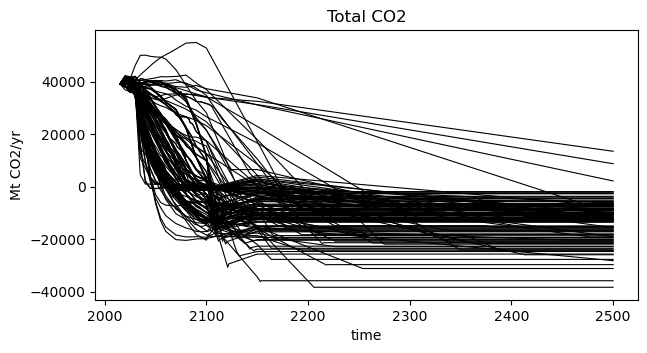

<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots(figsize=(7, 3.5))
co2_total = (
    wg3_emissions_extended.filter(variable="*CO2*")
    .process_over(
        "variable",
        "sum",
        op_cols={"variable": "AR6 climate diagnostics|Infilled|Emissions|CO2"},
        as_run=True,
    )
    .filter(variable="AR6 climate diagnostics|Infilled|Emissions|CO2")
    .lineplot(
        legend=False, errorbar=False, hue="scenario", palette=["black"], ci=None, lw=0.8
    )
)  # .title('Emissions|CO2 extended')

plt.title("Total CO2")